# How to compute magnetic forces using Force Module

This tutorial shows the different steps to **compute magnetic forces** with pyleecan.
 
The notebook related to this tutorial is available on [GitHub](https://github.com/Eomys/pyleecan/tree/master/Tutorials/tuto_Force.ipynb).

To demonstrate the capabilities and the use of the SciDataTool objects, a simulation is launched with FEMM, with imposed currents, using periodicity and parallelization to reduce execution time.

In [5]:
# Import Pyleecan modules
from numpy import exp, sqrt, pi
from os.path import join
from pyleecan.Classes.Simu1 import Simu1
from pyleecan.Classes.InputCurrent import InputCurrent
from pyleecan.Classes.MagFEMM import MagFEMM
from pyleecan.Classes.ForceMT import ForceMT
from pyleecan.Classes.Output import Output
from pyleecan.Functions.load import load
from pyleecan.definitions import DATA_DIR

# Load the machine
IPMSM_A = load(join(DATA_DIR, "Machine", "IPMSM_A.json"))

# Simulation initialization
simu = Simu1(name="FEMM_periodicity", machine=IPMSM_A)

# Definition of the enforced output of the electrical module
simu.input = InputCurrent(
    Na_tot=252 * 8,
    Nt_tot=50 * 8,
    N0=1000,
)
# Set Id/Iq according to I0/Phi0
simu.input.set_Id_Iq(I0=250 / sqrt(2), Phi0=140*pi/180)

# Definition of the magnetic simulation: with periodicity
simu.mag = MagFEMM(is_periodicity_a=True, is_periodicity_t=True, nb_worker=4)
simu.force = ForceMT(is_periodicity_a=True, is_periodicity_t=True)

# Run simulations
out = simu.run()

[14:45:59] Starting running simulation FEMM_periodicity (machine=IPMSM_A)
[14:46:00] Starting Magnetic module
[14:46:01] Solving time step 39 / 50 in FEMM
[14:46:01] Solving time step 1 / 50 in FEMM
[14:46:01] Solving time step 14 / 50 in FEMM
[14:46:01] Solving time step 27 / 50 in FEMM
[14:46:03] Solving time step 40 / 50 in FEMM
[14:46:03] Solving time step 2 / 50 in FEMM
[14:46:03] Solving time step 28 / 50 in FEMM
[14:46:03] Solving time step 15 / 50 in FEMM
[14:46:05] Solving time step 3 / 50 in FEMM
[14:46:05] Solving time step 41 / 50 in FEMM
[14:46:05] Solving time step 16 / 50 in FEMM
[14:46:05] Solving time step 29 / 50 in FEMM
[14:46:07] Solving time step 4 / 50 in FEMM
[14:46:07] Solving time step 42 / 50 in FEMM
[14:46:07] Solving time step 30 / 50 in FEMM
[14:46:07] Solving time step 17 / 50 in FEMM
[14:46:09] Solving time step 5 / 50 in FEMM
[14:46:09] Solving time step 43 / 50 in FEMM
[14:46:09] Solving time step 18 / 50 in FEMM
[14:46:10] Solving time step 31 / 50 in 

## Force Module
The Force abstract class will make it possible to define different ways of calculating forces. 

The ForceMT class inherits from Force class. ForceMT is dedicated to the computation of air-gap surface force based on the Maxwell stress tensor \[[source](https://eomys.com/IMG/pdf/comparison-main-magnetic.pdf)\]. 

Here, we get the results from a magnetic simulation without any force calculation. The Force module is initialized and run alone. 

In [7]:
from pyleecan.Classes.Simu1 import Simu1
from pyleecan.Classes.ForceMT import ForceMT

# Create the Simulation
mySimu = Simu1(name="Tuto_Force")  
mySimu.parent = out
mySimu.force = ForceMT()

# Run only the force module
mySimu.force.run()

[14:46:58] Starting Force module


Once the simulation is finished, the results are stored in the force part of the output (i.e. _myResults.force_ ) and we can call different plots. This object contains:   
- *time*: Time vector without symmetry   
- *angle*: Position vector without symmetry   
- *Nt_tot*: Length of the time vector
- *Na_tot*: Length of the angle vector 
- *Prad*: Radial airgap surface force  
- *Ptan*: Tangential airgap surface force
    
**Output** object embbed different plot to visualize results easily. You can find a dedicated tutorial [here](https://www.pyleecan.org/tuto_Plots.html).

Here are some example of useful plots.

<IPython.core.display.Javascript object>


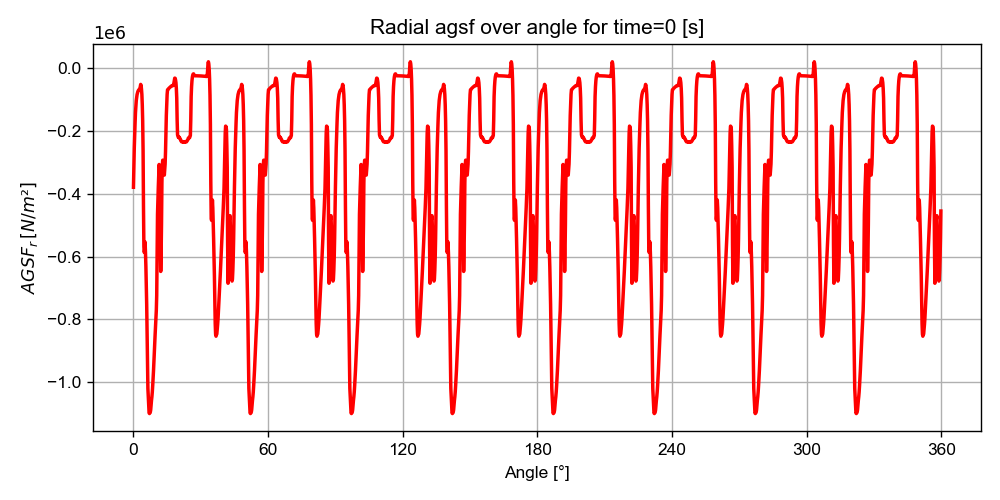

<IPython.core.display.Javascript object>


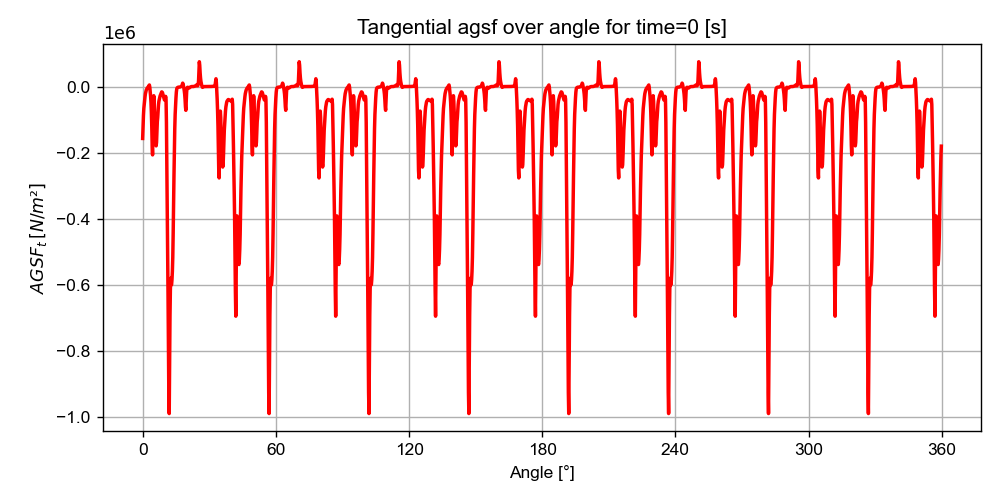

<IPython.core.display.Javascript object>


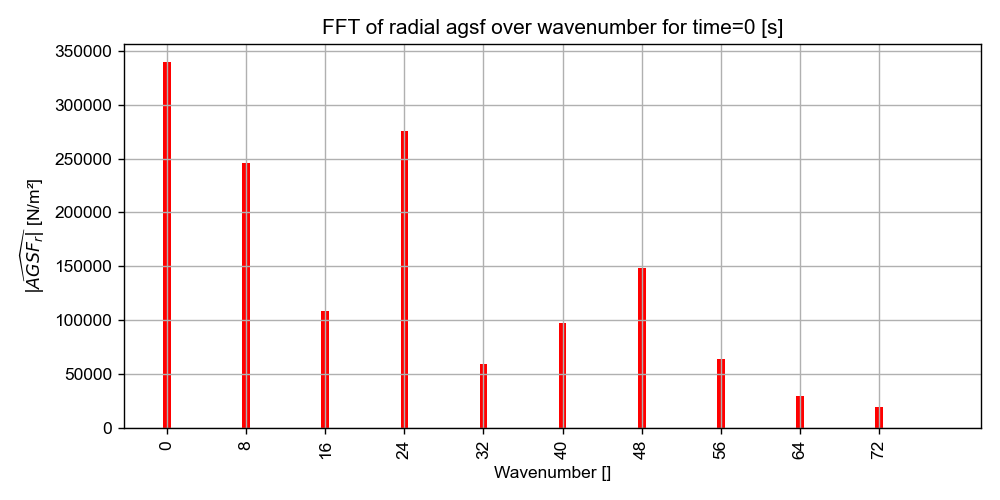

<IPython.core.display.Javascript object>


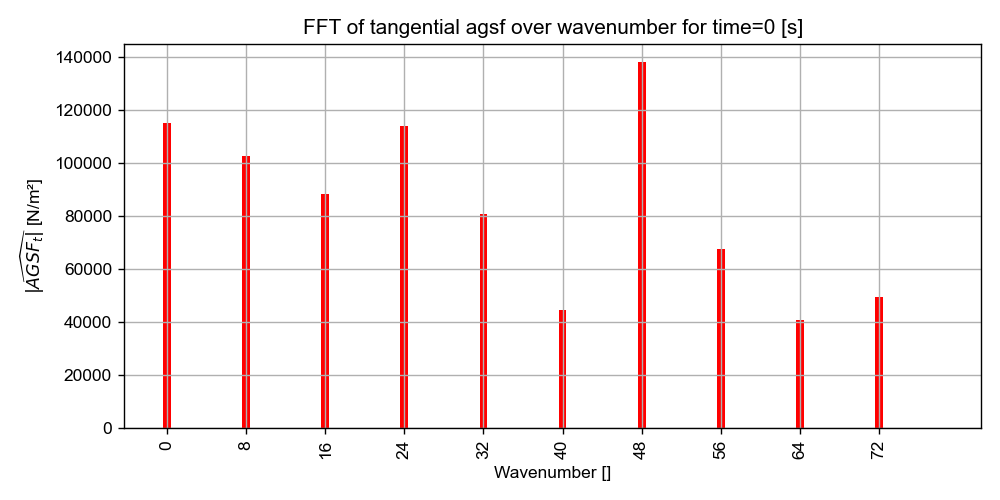

In [11]:
%matplotlib notebook
from pyleecan.Functions.Plot import dict_2D, dict_3D
out.force.AGSF.plot_2D_Data("angle{°}", **dict_2D)
out.force.AGSF.plot_2D_Data("wavenumber=[0,78]", **dict_2D)

<IPython.core.display.Javascript object>


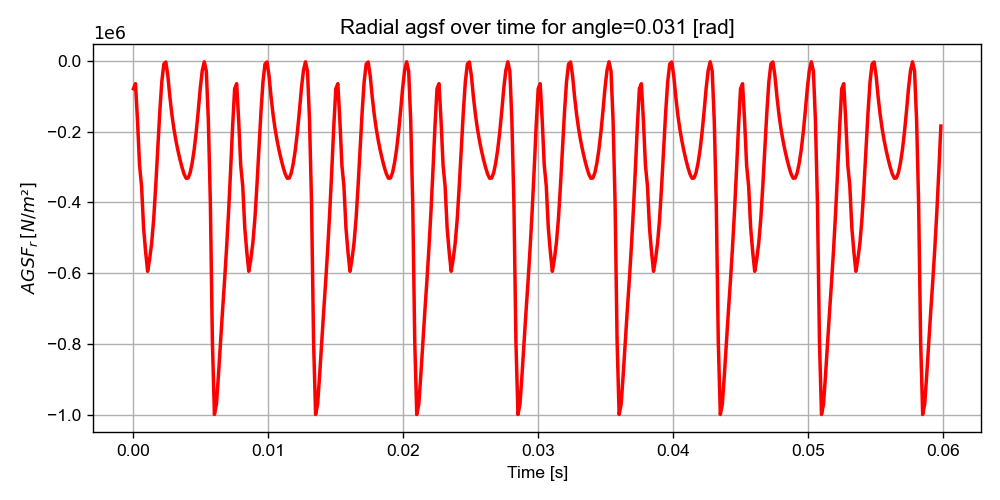

<IPython.core.display.Javascript object>


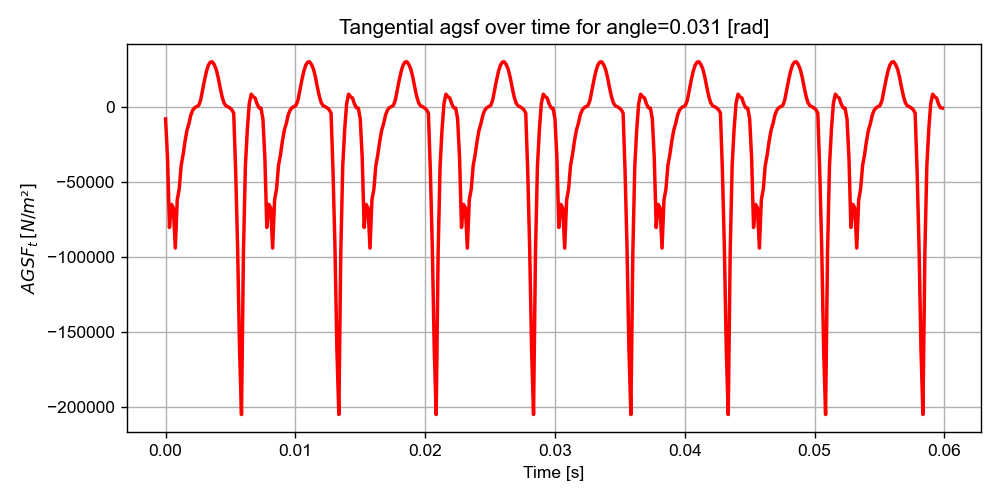

<IPython.core.display.Javascript object>


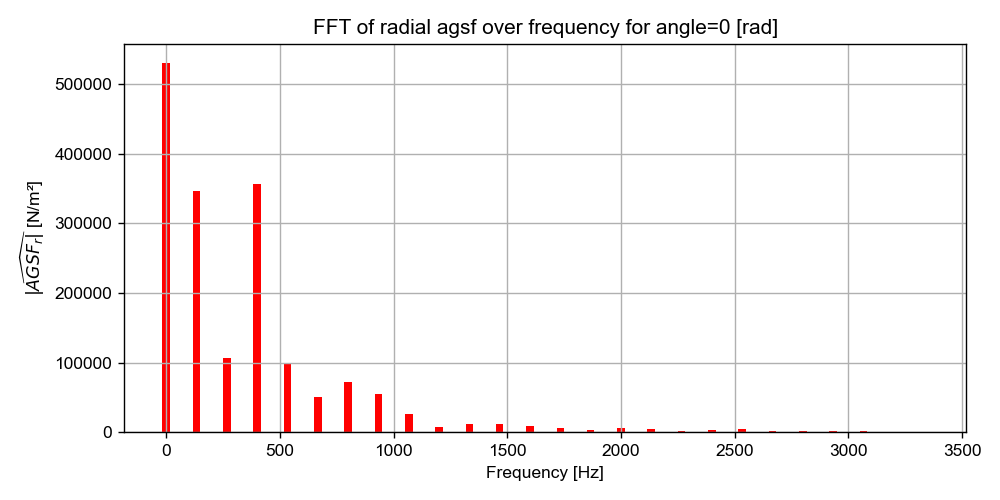

<IPython.core.display.Javascript object>


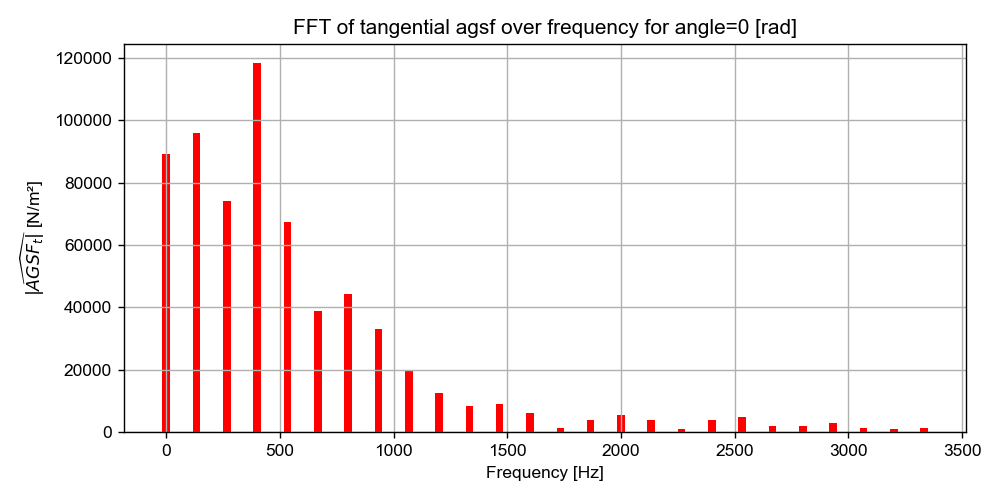

In [12]:
from numpy import pi

#------------------------------------------------------
# Plot the air-gap force as a function of time with the time fft
out.force.AGSF.plot_2D_Data("time","angle[10]", is_auto_ticks=False, **dict_2D)
out.force.AGSF.plot_2D_Data("freqs=[0,4000]", is_auto_ticks=False, **dict_2D)
#------------------------------------------------------

The following plot displays the radial air-gap surface force over time and angle. 

<IPython.core.display.Javascript object>


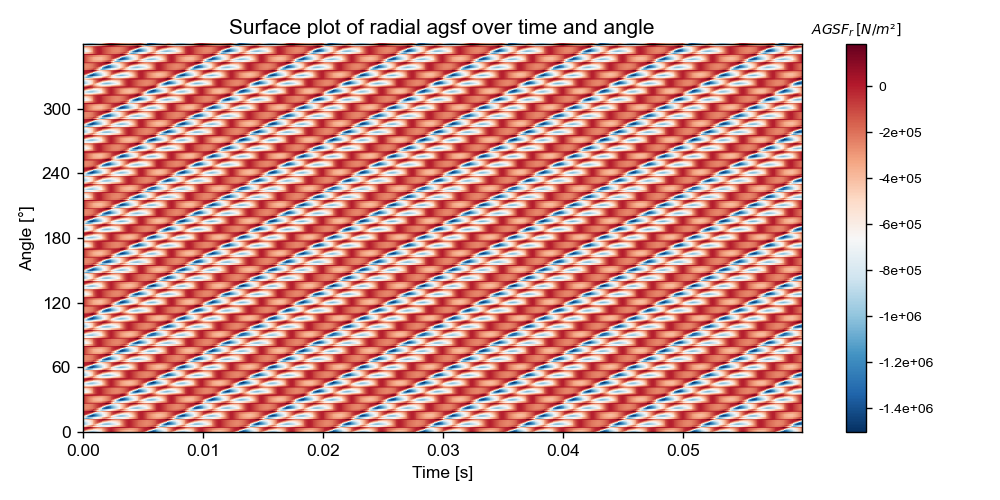

<IPython.core.display.Javascript object>


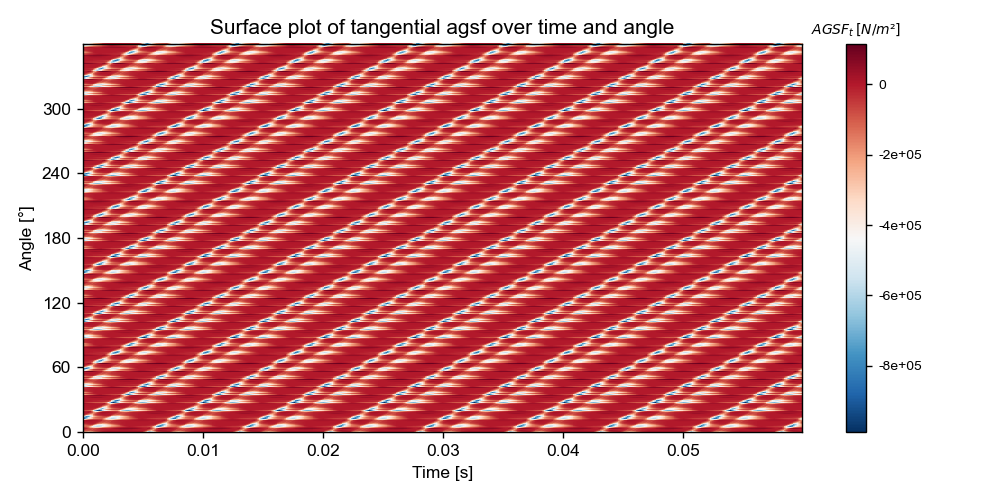

In [13]:
#------------------------------------------------------
# Plot the tangential force as a function of time and space
out.force.AGSF.plot_3D_Data("time", "angle{°}", is_2D_view=True, **dict_3D)
#------------------------------------------------------